In [1]:
import datetime

import pytz 
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

from model.helpers import train, predict
from model.preprocessors import process_inputs, process_targets

Todo 
1. Figure out if the model is doing the right thing
2. Check to see if you can normalize your linear regression model
3. Helper function to save the model

/var/folders/1v/rk6rvp992ygfg7545p25wtl80000gn/T/ipykernel_85476/4101667027.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mlt = pd.read_csv('data/mlt.csv', index_col='Date', parse_dates=True)


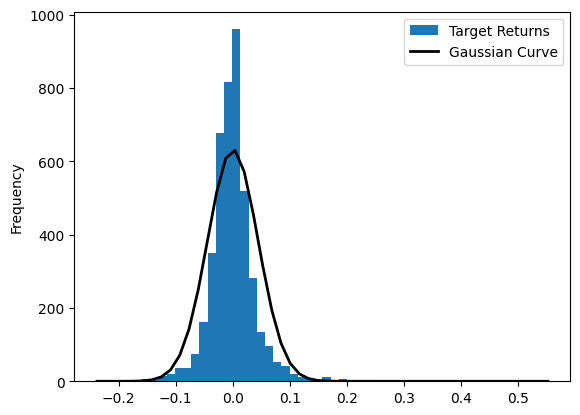

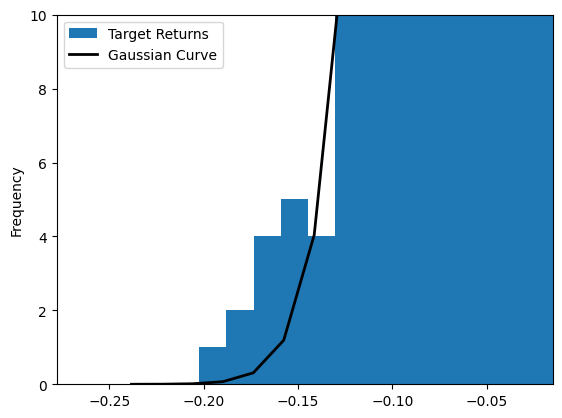

[Epoch 0] Loss: 0.0276
[Epoch 1] Loss: 0.0271
[Epoch 2] Loss: 0.0270
[Epoch 3] Loss: 0.0267
[Epoch 4] Loss: 0.0270
[Epoch 5] Loss: 0.0268
[Epoch 6] Loss: 0.0270
[Epoch 7] Loss: 0.0268
[Epoch 8] Loss: 0.0268
[Epoch 9] Loss: 0.0271
[Epoch 10] Loss: 0.0268
[Epoch 11] Loss: 0.0268
[Epoch 12] Loss: 0.0268
[Epoch 13] Loss: 0.0267
[Epoch 14] Loss: 0.0269
[Epoch 15] Loss: 0.0271
[Epoch 16] Loss: 0.0269
[Epoch 17] Loss: 0.0267
[Epoch 18] Loss: 0.0270
[Epoch 19] Loss: 0.0267
[Epoch 20] Loss: 0.0270
[Epoch 21] Loss: 0.0268
[Epoch 22] Loss: 0.0269
[Epoch 23] Loss: 0.0267
[Epoch 24] Loss: 0.0268
[Epoch 25] Loss: 0.0266
[Epoch 26] Loss: 0.0268
[Epoch 27] Loss: 0.0267
[Epoch 28] Loss: 0.0266
[Epoch 29] Loss: 0.0269
[Epoch 30] Loss: 0.0267
[Epoch 31] Loss: 0.0267
[Epoch 32] Loss: 0.0266
[Epoch 33] Loss: 0.0265
[Epoch 34] Loss: 0.0266
[Epoch 35] Loss: 0.0267
[Epoch 36] Loss: 0.0267
[Epoch 37] Loss: 0.0268
[Epoch 38] Loss: 0.0266
[Epoch 39] Loss: 0.0266
[Epoch 40] Loss: 0.0268
[Epoch 41] Loss: 0.0267
[E

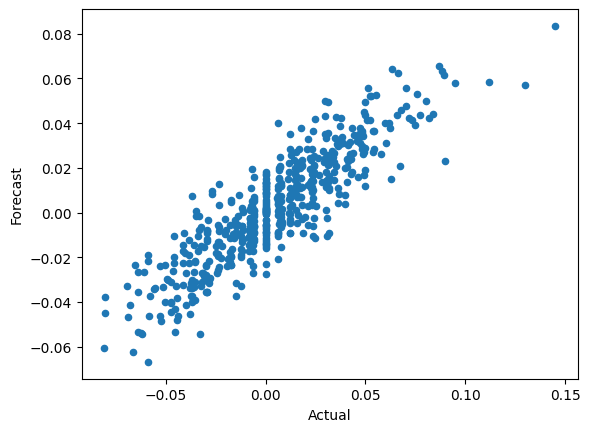

R Squared: 0.7489, Mean Absolute Error: 0.0128


In [ ]:
mlt = pd.read_csv('data/mlt.csv', index_col='Date', parse_dates=True)
price_series = mlt[' Close'].dropna()
perf_series = price_series.pct_change(1).dropna() # 1-day returns

x_df = process_inputs(perf_series, window_length=40) # 40-day rolling window
# y_series = perf_series.shift(-1).dropna()
y_series = price_series.pct_change(5).dropna() # 1-day returns
# y_series = process_targets(perf_series, 20) # 1-day returns

# Align the indices of x_df and y_series
common_index = x_df.index.intersection(y_series.index)
x_df, y_series = x_df.loc[common_index], y_series.loc[common_index]

# training_cutoff = datetime.datetime(2006, 1, 1, tzinfo=pytz.timezone('America/New_York'))
#train test split
training_cutoff = datetime.datetime(2023, 1, 1)
training_x_series = x_df.loc[x_df.index < training_cutoff]
training_y_series = y_series.loc[y_series.index < training_cutoff]

trained_model = train(training_x_series, training_y_series)

# Isolate test data
test_x_series = x_df.loc[x_df.index >= training_cutoff]
actual_series = y_series.loc[y_series.index >= training_cutoff]

forecast_series = predict(trained_model, test_x_series)
results_df = forecast_series.to_frame('Forecast').join(actual_series.to_frame('Actual')).dropna()

# Evaluate forecasts
results_df.plot.scatter(x='Actual', y='Forecast')
plt.show()
print(f"R Squared: {r2_score(results_df['Actual'], results_df['Forecast']):.4f}, "
        f"Mean Absolute Error: {mean_absolute_error(results_df['Actual'], results_df['Forecast']):.4f}")


In [ ]:
predict(trained_model, x_df.iloc[0])

T - 39    0.000000
T - 38    0.000000
T - 37    0.008929
T - 36    0.000000
T - 35    0.026549
T - 34    0.043103
T - 33   -0.033058
T - 32    0.000000
T - 31    0.008547
T - 30   -0.016949
T - 29   -0.017241
T - 28   -0.035088
T - 27   -0.018182
T - 26   -0.009259
T - 25   -0.018692
T - 24    0.095238
T - 23    0.043478
T - 22    0.091667
T - 21    0.022901
T - 20   -0.014925
T - 19    0.000000
T - 18   -0.007576
T - 17    0.007634
T - 16    0.000000
T - 15    0.000000
T - 14    0.000000
T - 13    0.000000
T - 12    0.000000
T - 11   -0.022727
T - 10    0.000000
T - 9     0.007752
T - 8     0.000000
T - 7     0.000000
T - 6    -0.007692
T - 5    -0.031008
T - 4    -0.008000
T - 3     0.008065
T - 2     0.008000
T - 1    -0.007937
T - 0    -0.008000
Name: 2025-03-04 00:00:00, dtype: float64

In [9]:
test_x_series

,T - 39,T - 38,T - 37,T - 36,T - 35,T - 34,T - 33,T - 32,T - 31,T - 30,...,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,T - 0
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-27,0.000000,0.026549,0.043103,-0.033058,0.000000,0.008547,-0.016949,-0.017241,-0.035088,-0.018182,...,-0.007692,-0.031008,-0.008000,0.008065,0.008000,-0.007937,-0.008000,0.000000,-0.008065,0.008130
2025-02-26,0.026549,0.043103,-0.033058,0.000000,0.008547,-0.016949,-0.017241,-0.035088,-0.018182,-0.009259,...,-0.031008,-0.008000,0.008065,0.008000,-0.007937,-0.008000,0.000000,-0.008065,0.008130,-0.008065
2025-02-25,0.043103,-0.033058,0.000000,0.008547,-0.016949,-0.017241,-0.035088,-0.018182,-0.009259,-0.018692,...,-0.008000,0.008065,0.008000,-0.007937,-0.008000,0.000000,-0.008065,0.008130,-0.008065,0.008130
2025-02-24,-0.033058,0.000000,0.008547,-0.016949,-0.017241,-0.035088,-0.018182,-0.009259,-0.018692,0.095238,...,0.008065,0.008000,-0.007937,-0.008000,0.000000,-0.008065,0.008130,-0.008065,0.008130,-0.016129
2025-02-21,0.000000,0.008547,-0.016949,-0.017241,-0.035088,-0.018182,-0.009259,-0.018692,0.095238,0.043478,...,0.008000,-0.007937,-0.008000,0.000000,-0.008065,0.008130,-0.008065,0.008130,-0.016129,-0.008197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,0.017045,0.000000,0.000000,-0.005587,0.005618,-0.022346,-0.005714,0.000000,0.017241,0.000000,...,0.000000,0.000000,-0.005618,0.000000,0.005650,0.005618,-0.027933,0.005747,0.017143,0.022472
2022-01-06,0.000000,0.000000,-0.005587,0.005618,-0.022346,-0.005714,0.000000,0.017241,0.000000,0.005650,...,0.000000,-0.005618,0.000000,0.005650,0.005618,-0.027933,0.005747,0.017143,0.022472,0.005495
2022-01-05,0.000000,-0.005587,0.005618,-0.022346,-0.005714,0.000000,0.017241,0.000000,0.005650,-0.011236,...,-0.005618,0.000000,0.005650,0.005618,-0.027933,0.005747,0.017143,0.022472,0.005495,0.010929


In [6]:
import pickle

with open("8_day_reit_model.pkl", "wb") as f:
    pickle.dump(trained_model, f)

In [ ]:
import torch
torch.save(trained_model.state_dict(), path)